In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from keras import Input
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import itertools

In [2]:
import os
train_image_files_path='C:/Users/ADMIN/Downloads/datanumber3/filetrain'
valid_image_files_path='C:/Users/ADMIN/Downloads/datanumber3/filevalid'

In [3]:
label=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [4]:
from keras.preprocessing.image import ImageDataGenerator
train_data_gen = ImageDataGenerator(rescale=1/255)
valid_data_gen = ImageDataGenerator(rescale=1/255)

In [5]:
train_generator = train_data_gen.flow_from_directory(
    train_image_files_path,
    target_size=(40,40),
    class_mode='categorical'
)

valid_generator = valid_data_gen.flow_from_directory(
    valid_image_files_path,
    target_size=(40,40),
    class_mode='categorical'
)

Found 2000 images belonging to 10 classes.
Found 200 images belonging to 10 classes.


In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten

model=Sequential()

#LopCNN1
model.add(Conv2D(4,(3,3), activation='relu',input_shape=(40,40,3)))
model.add(Dropout(rate=0.1))
model.add(MaxPooling2D(2,2))

#LopCNN2
model.add(Conv2D(8,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

#LopCNN3
model.add(Conv2D(16,(3,3), activation='relu'))
model.add(Dropout(rate=0.2))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(70,activation=tf.nn.relu))
model.add(Dense(10, activation=tf.nn.softmax))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 38, 38, 4)         112       
                                                                 
 dropout (Dropout)           (None, 38, 38, 4)         0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 19, 19, 4)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 17, 17, 8)         296       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 16)          1

In [8]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['acc'])

In [9]:
EPOCHS=80
history=model.fit(
    train_generator,
    steps_per_epoch=10,
    epochs=EPOCHS,
    verbose=1,
    validation_data=valid_generator,
    validation_steps=5
)

Epoch 1/80
10/10 [==============================] - 2s 92ms/step - loss: 2.2611 - acc: 0.1500 - val_loss: 2.2357 - val_acc: 0.2250
Epoch 2/80
10/10 [==============================] - 1s 68ms/step - loss: 2.1817 - acc: 0.2688 - val_loss: 2.1649 - val_acc: 0.2875
Epoch 3/80
10/10 [==============================] - 1s 60ms/step - loss: 2.0437 - acc: 0.3344 - val_loss: 2.0147 - val_acc: 0.3688
Epoch 4/80
10/10 [==============================] - 1s 65ms/step - loss: 1.8827 - acc: 0.3469 - val_loss: 1.8102 - val_acc: 0.4375
Epoch 5/80
10/10 [==============================] - 1s 53ms/step - loss: 1.6179 - acc: 0.4313 - val_loss: 1.5985 - val_acc: 0.4625
Epoch 6/80
10/10 [==============================] - 1s 57ms/step - loss: 1.3649 - acc: 0.5428 - val_loss: 1.4124 - val_acc: 0.6375
Epoch 7/80
10/10 [==============================] - 1s 51ms/step - loss: 1.1766 - acc: 0.6344 - val_loss: 1.2084 - val_acc: 0.6438
Epoch 8/80
10/10 [==============================] - 1s 61ms/step - loss: 0.9819 - a

In [10]:
# # Chuyển đổi mô hình thành TensorFlow Lite
# converter = tf.lite.TFLiteConverter.from_keras_model(model)
# tflite_model = converter.convert()

# # Lưu mô hình TensorFlow Lite vào file
# with open('converted_model.tflite', 'wb') as f:
#     f.write(tflite_model)



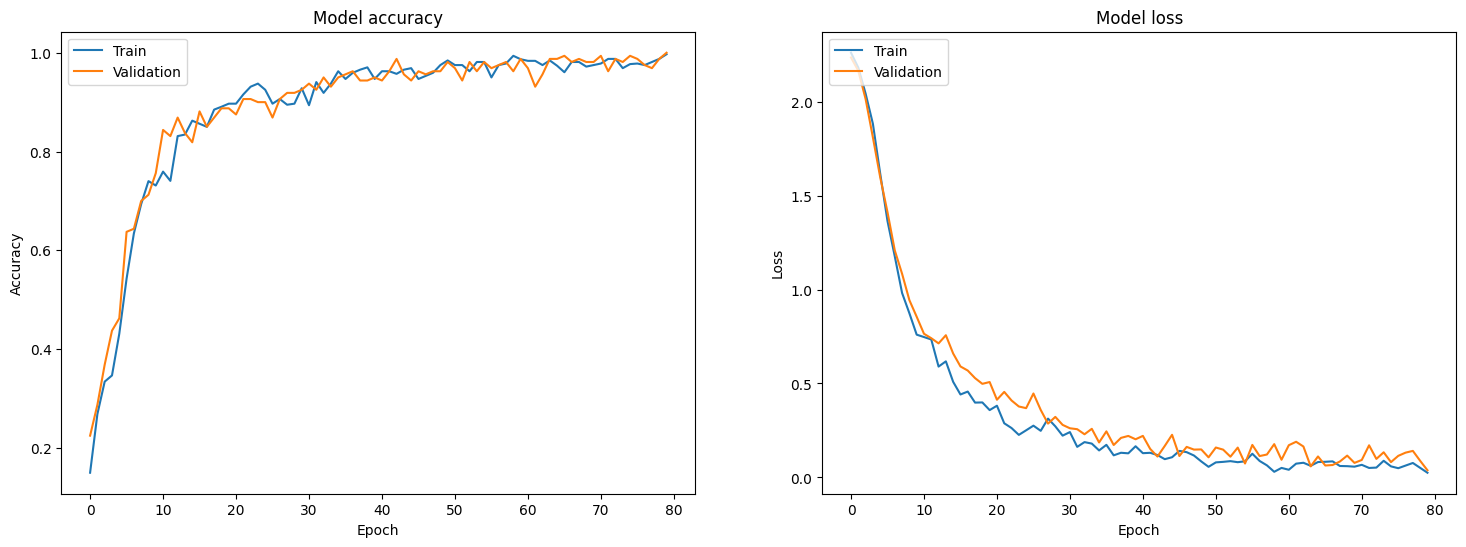

In [11]:
fig, axes = plt.subplots(1,2, figsize=(18, 6))
# Plot training & validation accuracy values
axes[0].plot(history.history['acc'])
axes[0].plot(history.history['val_acc'])
axes[0].set_title('Model accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
axes[1].plot(history.history['loss'])
axes[1].plot(history.history['val_loss'])
axes[1].set_title('Model loss')
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Train', 'Validation'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 180ms/step
Gia tri du doan: 7


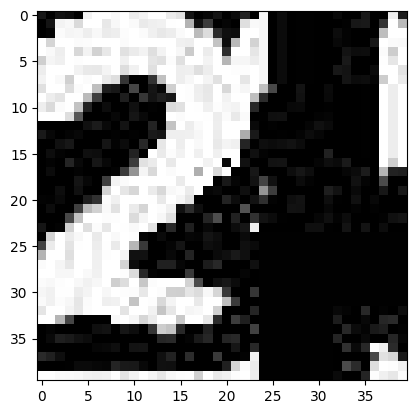

In [12]:
from keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt

# for i in range (8):
    # img_path='C:/Users/ADMIN/Downloads/datanumber/filetest/9b/9b ('+str(i+1)+').jpg'

img_gray = cv.imread('C:/Users/ADMIN/Downloads/datanumber/PIC2.JPG')

resized_image = cv.resize(img_gray, (40, 40))

plt.imshow(resized_image)

x=tf.keras.utils.img_to_array(resized_image)
# x = np.transpose(x, (1, 0, 2))
x=np.expand_dims(x,axis=0)
images= np.vstack([x])
y_predict = model.predict(images, batch_size=10)
predicted_numbers = np.argmax(y_predict, axis=1)
print('Gia tri du doan:', label[np.argmax(y_predict)])